In [18]:
# importando as bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # biblioteca da matplotlib que permite a formatação do gráfico

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/danielvieira95/Inteligencia_Artificial_2025/refs/heads/main/bases_de_dados/monitoramento_tempo.csv')

In [6]:
df.head() # Exibe as 4 primeiras linhas do dataframe

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
0,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 12:00:00
1,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 13:00:00
2,282.083252,1024.0,80.0,4.0,0.0,Domingo,2012-10-01 14:00:00
3,282.091866,1024.0,80.0,18.0,0.0,Domingo,2012-10-01 15:00:00
4,282.100481,1024.0,80.0,31.0,0.0,Domingo,2012-10-01 16:00:00


In [7]:
df.tail() # Exibe as 4 útltimas linhas do dataframe

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
45248,282.00,1031.0,81.0,50.0,2.0,Terça,2017-11-29 20:00:00
45249,282.89,1030.0,71.0,330.0,1.0,Terça,2017-11-29 21:00:00
45250,283.39,1030.0,71.0,290.0,1.0,Terça,2017-11-29 22:00:00
45251,283.02,1029.0,71.0,290.0,2.0,Terça,2017-11-29 23:00:00
45252,282.28,1029.0,76.0,340.0,1.0,Quarta,2017-11-30 00:00:00


In [8]:
# Importa a bilbioteca datetima para fazer a conversão dos dados de data de objeto para datatime
import datetime
df['data'] = pd.to_datetime(df['data']) # conversão da coluna data para datetime 64

In [9]:
df.info() # exibe as informações da base de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   temperatura          45253 non-null  float64       
 1   pressão              45253 non-null  float64       
 2   humidade             45253 non-null  float64       
 3   direção do vento     45253 non-null  float64       
 4   velocidade do vento  45253 non-null  float64       
 5   dia_da_semana        45253 non-null  object        
 6   data                 45253 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.4+ MB


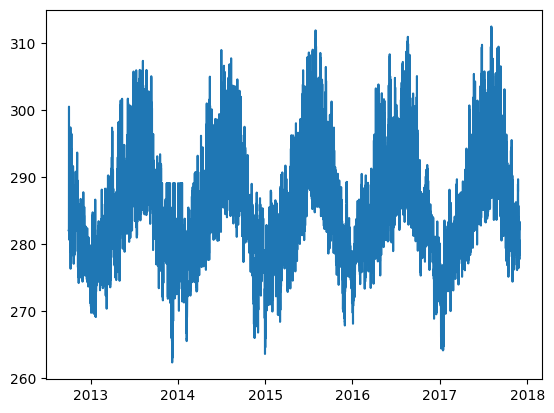

In [10]:
plt.plot(df['data'],df['temperatura']) # plota o grafico temperatura x data

C:\Users\dsadm\AppData\Local\Temp\ipykernel_72684\48056267.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  eixo.legend()


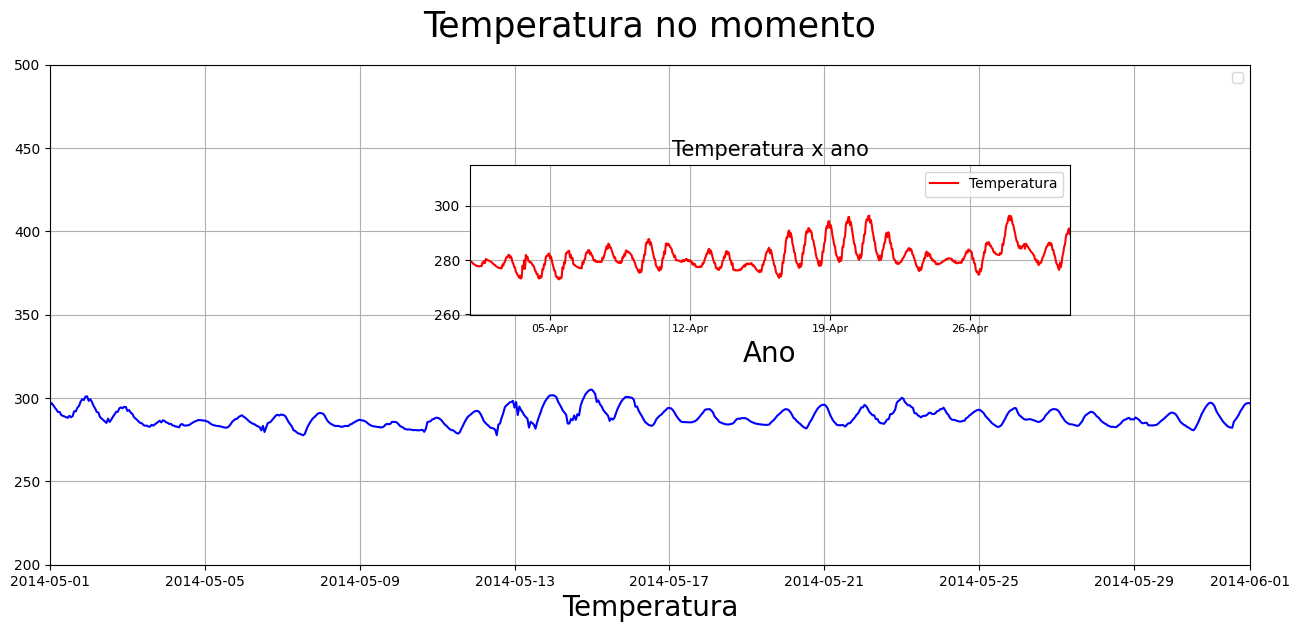

In [31]:
# criando código para plotar um gráfico dentro do outro
fig = plt.figure(figsize=(12,5))
eixo = fig.add_axes([0,0,1,1]) # cria os eixos da figura
eixo.set_ylim(200, 500) # define limites do gráfico
eixo.plot(df['data'],df['temperatura'],color='b') # plota o gráfico
eixo.grid(True) # ativa a grade do gráfico
# definindo o período do gráfico
eixo.set_xlim(datetime.datetime(2014,5,1),datetime.datetime(2014,6,1)) # define o período do gráfico
eixo.set_title('Temperatura no momento',fontsize=25,pad=20) #título do gráfico
eixo.set_xlabel('Temperatura',fontsize=20) # título do eixo
eixo.legend()


# criando o eixo 2 dentro do gráfico
eixo2 = fig.add_axes([0.35, 0.50, 0.5, 0.3]) # cria eixo 2 para o gráfico

#definindo um espaçamento de tick a cada 7 dias
eixo2.xaxis.set_major_locator(mdates.DayLocator(interval=7)) # definindo o intervalo do eixo x
eixo2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b')) # formatação da data exibindo o mês e o dia


# definindo o período do gráfico desejadolimites do eixo x
eixo2.set_xlim(datetime.datetime(2015,4,1),datetime.datetime(2015,5,1))
eixo2.tick_params(axis='x',labelsize=8) # espaçamento do eixo x
eixo2.plot(df['data'],df['temperatura'],color='r') # plotando o gráfico de temperatura
eixo2.grid(True) #ativa grade do gráfico
eixo2.set_title('Temperatura x ano',fontsize=15) #título do gráfico
eixo2.set_xlabel('Ano',fontsize=20) # título do eixo
eixo2.legend(['Temperatura'],loc='best',fontsize=10) # ativa a legenda do gráfico

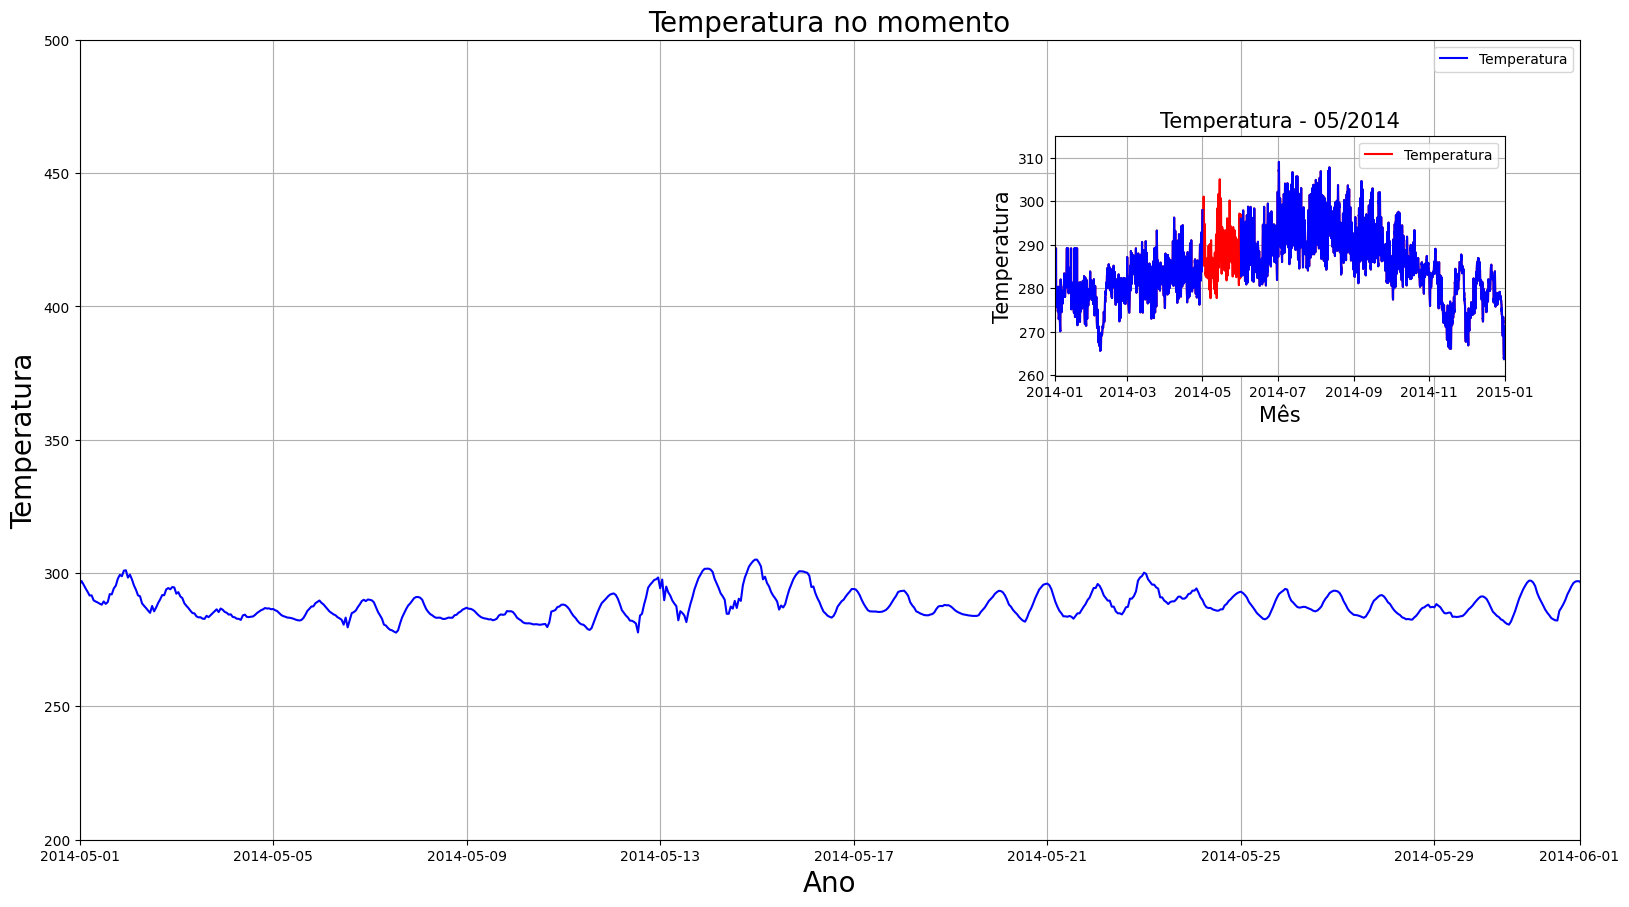

In [30]:
fig = plt.figure(figsize=(15,8)) # cria o tamanho da figura)
plt.rcParams['font.size']='10' # fonte da figura
eixo = fig.add_axes([0,0,1,1   ]) # cria o eixo 1
eixo.set_ylim(200,500) # define o limite do eixo y
eixo2= fig.add_axes([0.65, 0.58, 0.3, 0.3]) # cria o eixo 2
eixo.plot(df['data'],df['temperatura'],color='b')
eixo.grid(True)
# definindo o período do gráfico
eixo.set_xlim(datetime.datetime(2014,5,1),datetime.datetime(2014,6,1))
eixo.set_title('Temperatura no momento',fontsize=20)
eixo.set_ylabel('Temperatura',fontsize=20)
eixo.set_xlabel('Ano',fontsize=20)
eixo.legend(['Temperatura'],loc='best')
azul_esquerda=df['data']<datetime.datetime(2014,5,1) # armazena o período
azul_direita=df['data']>datetime.datetime(2014,6,1)
                
# Eixo 2
eixo2.set_xlim(datetime.datetime(2014,1,1),datetime.datetime(2015,1,1))
eixo2.plot(df['data'],df['temperatura'],color='r')
eixo2.plot(df[azul_esquerda]['data'],df[azul_esquerda]['temperatura'],color='b')
eixo2.plot(df[azul_direita]['data'],df[azul_direita]['temperatura'],color='b')
eixo2.grid(True)
eixo2.set_title('Temperatura - 05/2014',fontsize=15)
eixo2.set_ylabel('Temperatura',fontsize=15) # título do eixo
eixo2.set_xlabel('Mês',fontsize=15) # título do eixo
eixo2.legend(['Temperatura'],loc='best',fontsize=10) # ativa a legenda do gráfico


